In [1]:
  # Load the dataset
import pandas as pd
df = pd.read_csv("data.csv")  # Replace with the actual dataset path
df = df.sample(n=5000,random_state=42).reset_index(drop=True)
 

In [73]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.910,1977,0.500,['Idris Muhammad'],0.894,273067,0.5210,0,0KdzyvsBqX1HV3uLxGm2JV,0.772,4,0.068,-7.048,1,Camby Bolongo,34,1977,0.0847,126.805
1,0.583,1976,0.930,['Stan Getz'],0.585,182200,0.2720,0,1f4eO5waC6glPLXUhYKLm2,0.115,11,0.128,-16.693,0,Just One of Those Things,26,1976,0.0802,90.104
2,0.647,1994,0.157,"['Warren G', 'The Twinz']",0.878,179933,0.5200,1,1X07ZfF5KQt8dyJ5kAkVAQ,0.000,7,0.173,-12.609,1,Recognize,38,1994-06-07,0.4030,90.744
3,0.196,1957,0.937,['Red Garland Quintet'],0.463,925947,0.2870,0,5wmMDeM4qvLfwqLa2cvoks,0.837,0,0.112,-11.758,0,Soul Junction,13,1957,0.0363,186.764
4,0.422,1921,0.995,['Ignacio Corsini'],0.648,154240,0.0995,0,0SK1upzAP6NvIgF0uGh6z2,0.846,11,0.112,-22.429,1,Flor Marchita - Remasterizado,0,1921-03-20,0.1050,71.978


In [74]:
df.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [75]:
df.shape

(5000, 19)

In [76]:
df.tail()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
4995,0.612,2001,0.1840,['Alice Cooper'],0.533,186093,0.7030,0,5LY8GsHfU7G6tmeXxStEb6,0.000000,2,0.101,-6.364,1,No More Mr. Nice Guy - 2002 Remaster,42,2001,0.0423,128.761
4996,0.919,1999,0.0819,['Britney Spears'],0.714,200467,0.8520,0,6039GmVngyHmWfOuWOhjCK,0.000000,8,0.285,-6.570,1,Soda Pop,40,1999-01-12,0.0565,92.016
4997,0.345,2012,0.8820,['Issa Ibrahim'],0.215,167741,0.3190,0,4UuMkQLjxSgcrW2d1zFIJT,0.000013,0,0.228,-12.845,1,Susan,0,2012-09-03,0.0363,55.846
4998,0.286,1942,0.9900,"['Felix Mendelssohn', 'Paul Robeson Jr.', 'Law...",0.393,187267,0.0747,0,2rRxJzTQyvm5Wwj9ObnZvv,0.078400,10,0.102,-17.930,1,"The Lord God of Abraham, from Elijah, Op. 70",0,1942,0.0321,101.457
4999,0.633,1949,0.6410,"['Charles Gounod', 'Pierre Monteux']",0.449,89227,0.4510,0,2LDYmnVV9KfuvFhCCvF5t8,0.247000,0,0.139,-13.460,0,Ballet Music from Faust: III. Ancient Dance (A...,0,1949,0.0468,115.531


In [77]:
# Select relevant numerical features for clustering
from sklearn.preprocessing import StandardScaler

numerical_features = [
    "valence", "danceability", "energy", "tempo", 
    "acousticness", "liveness", "speechiness", "instrumentalness"
]

# Standardize the numerical features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_features]), columns=numerical_features)

In [78]:
df = df.dropna(subset=numerical_features)


In [79]:
# Optional: Split for testing or validation
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df_scaled, test_size=0.2, random_state=42)

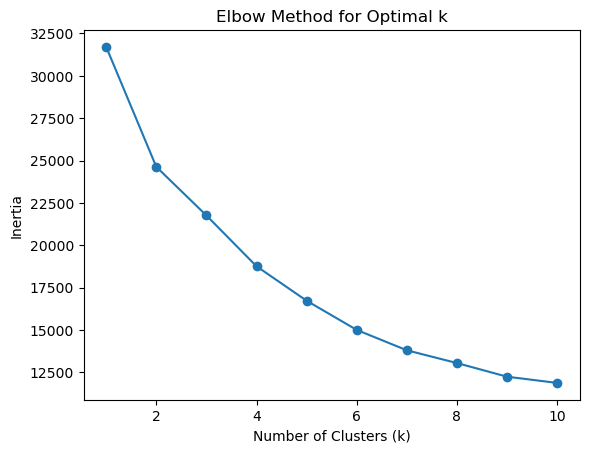

In [80]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

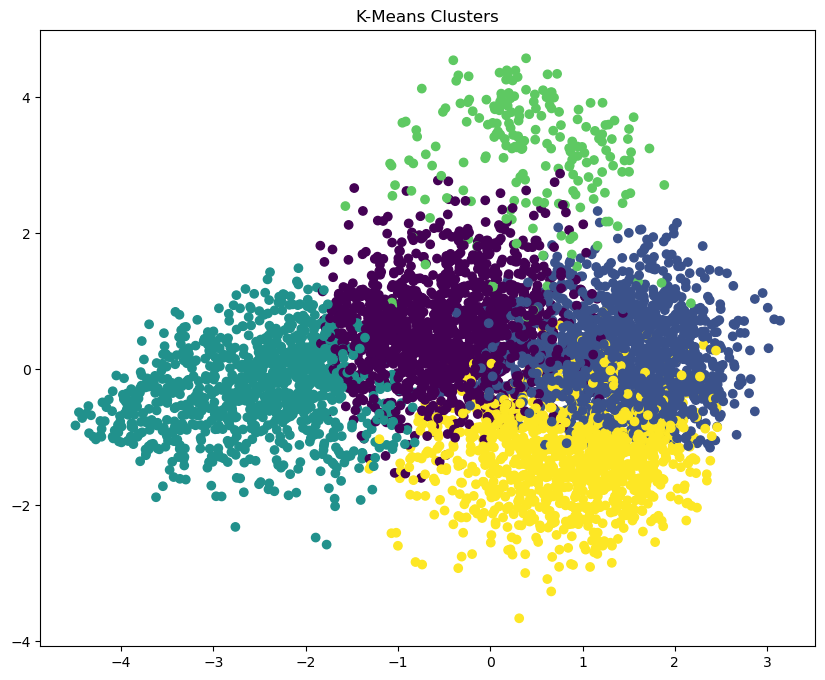

In [81]:
# Apply K-Means clustering with optimal k (e.g., k=5)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df["Cluster"] = kmeans.fit_predict(df_scaled)

# Visualize clusters using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

plt.figure(figsize=(10,8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df["Cluster"], cmap="viridis")
plt.title("K-Means Clusters")
plt.show()

In [82]:
cluster_summary = df.groupby("Cluster")[numerical_features].mean()
print(cluster_summary)


          valence  danceability    energy       tempo  acousticness  liveness  \
Cluster                                                                         
0        0.611015      0.567561  0.332961  119.515169      0.814869  0.207869   
1        0.721697      0.688784  0.667197  115.131089      0.213578  0.145868   
2        0.219246      0.335501  0.179103   98.390180      0.886310  0.180456   
3        0.519773      0.667678  0.264986  111.636822      0.540590  0.326672   
4        0.431850      0.456388  0.739040  134.481340      0.135919  0.284652   

         speechiness  instrumentalness  
Cluster                                 
0           0.070673          0.152435  
1           0.087603          0.054054  
2           0.044316          0.491036  
3           0.840784          0.014876  
4           0.074618          0.084648  


In [83]:
 from sklearn.metrics import silhouette_score
score = silhouette_score(df_scaled, df["Cluster"])
print(f"Silhouette Score: {score}")

Silhouette Score: 0.18069640665845163


In [84]:
import plotly.express as px
fig = px.scatter(
    x=pca_result[:, 0], y=pca_result[:, 1],
    color=df["Cluster"].astype(str),
    hover_data=[df["valence"], df["energy"], df["tempo"]]
)
fig.show()


In [85]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def recommend_songs(song_name, df, num_recommendations=5):
    # Get the cluster of the input song
    song_cluster = df[df["name"] == song_name]["Cluster"].values[0]

    # Filter songs from the same cluster
    same_cluster_songs = df[df["Cluster"] == song_cluster]

    # Calculate similarity within the cluster
    song_index = same_cluster_songs[same_cluster_songs["name"] == song_name].index[0]
    cluster_features = same_cluster_songs[numerical_features]
    similarity = cosine_similarity(cluster_features, cluster_features)

    # Get top recommendations
    similar_songs = np.argsort(similarity[song_index])[-(num_recommendations + 1):-1][::-1]
    recommendations = same_cluster_songs.iloc[similar_songs][["name", "year", "artists"]]

    return recommendations

In [86]:
# Example usage
input_song =  "Camby Bolongo"
recommended_songs = recommend_songs(input_song, df, num_recommendations=5)

print(f"Songs similar to '{input_song}':")
recommended_songs

Songs similar to 'Camby Bolongo':


,name,year,artists
3444,Bitch to the Boys,1982,['Shakatak']
3027,Chella llà - Instrument and base Version,1942,['Orchestra Studio 7']
4899,Danse Fambeaux,1968,['Dr. John']
3124,"Aragon - From The ""Coffy"" Soundtrack",1973,['Roy Ayers']
647,Into Black,2011,['Blouse']


In [87]:
# Example usage
input_song = "Soul Junction"
recommended_songs = recommend_songs(input_song, df, num_recommendations=5)

print(f"Songs similar to '{input_song}':")
recommended_songs

Songs similar to 'Soul Junction':


,name,year,artists
1088,Legends of the Fall,1995,"['James Horner', 'Vic Frasier']"
3489,"Water Music Suite No. 1 In F, HWV 348: 2. Adag...",1983,"['George Frideric Handel', 'The English Concer..."
2473,"Le sacre du printemps: Part 1 ""Adoration of th...",1948,"['Igor Stravinsky', 'Columbia Symphony Orchest..."
1277,Saving Buckbeak,2004,['John Williams']
3385,"Tristan und Isolde, WWV 90: Prelude",1953,"['Richard Wagner', 'Arturo Toscanini']"


In [88]:
# save df
df.to_csv("clustered_df.csv")

In [89]:
import numpy as np

# 1. Feature Engineering

df['song_length_minutes'] = df['duration_ms'] / 60000
df['is_instrumental'] = df['instrumentalness'].apply(lambda x: 1 if x > 0.8 else 0)
df['is_live'] = df['liveness'].apply(lambda x: 1 if x > 0.8 else 0)

 
 

In [90]:
# Mood categorization based on valence and energy
def classify_mood(valence, energy):
    if valence >= 0.5 and energy >= 0.5:
        return "happy"
    elif valence < 0.5 and energy >= 0.5:
        return "tense"
    elif valence >= 0.5 and energy < 0.5:
        return "calm"
    else:
        return "sad"

df['mood'] = df.apply(lambda row: classify_mood(row['valence'], row['energy']), axis=1)


In [91]:
# 2. Clustering for Genre-Like Grouping
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features_for_clustering = ['valence', 'acousticness', 'danceability', 'energy',
                           'instrumentalness', 'liveness', 'speechiness', 'tempo']


In [92]:
# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features_for_clustering])


In [93]:
# KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['audio_cluster'] = kmeans.fit_predict(scaled_features)


In [94]:
# Show updated dataframe sample
df[['name', 'artists', 'mood', 'is_instrumental', 'is_live', 'song_length_minutes', 'audio_cluster']].head(10)

,name,artists,mood,is_instrumental,is_live,song_length_minutes,audio_cluster
0,Camby Bolongo,['Idris Muhammad'],happy,0,0,4.551117,1
1,Just One of Those Things,['Stan Getz'],calm,0,0,3.036667,0
2,Recognize,"['Warren G', 'The Twinz']",happy,0,0,2.998883,1
3,Soul Junction,['Red Garland Quintet'],sad,1,0,15.432450,2
4,Flor Marchita - Remasterizado,['Ignacio Corsini'],sad,1,0,2.570667,2
5,Freak in You,['PARTYNEXTDOOR'],sad,0,0,4.539000,4
6,ST 100/6,['Big Star'],sad,0,0,0.981783,0
7,Madama Butterfly / Act 2: Ora a noi. Sedete qui,"['Giacomo Puccini', 'Giovanni Inghilleri', 'Re...",sad,0,0,3.242883,2
8,My Babe,['Nancy Wilson'],happy,0,0,2.178667,1
9,Big Money,['Big Black'],tense,0,0,2.483333,4


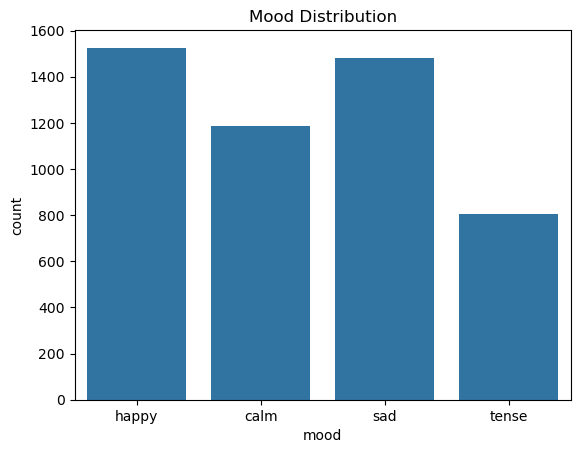

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='mood', data=df)
plt.title("Mood Distribution")
plt.show()

In [96]:
def recommend_songs_by_mood(df, mood_input, num_recommendations=10):
    # Filter songs matching the mood
    mood_matches = df[df['mood'] == mood_input]

    # If you want more diversity, optionally sort by popularity or random sample
    if len(mood_matches) >= num_recommendations:
        recommendations = mood_matches.sample(n=num_recommendations, random_state=42)
    else:
        # If not enough songs match, return all available
        recommendations = mood_matches

    return recommendations[['name', 'artists','song_length_minutes']]


In [97]:
# Recommend 5 "calm" mood songs
recommendations = recommend_songs_by_mood(df, mood_input="happy", num_recommendations=5)
print(recommendations)


                                                   name  \
4711                      You Need A Man/ Coming To You   
254                          Do You Think I Really Care   
3301                                         La Rielera   
2114  I Got (feat. Pimp C & Project Pat) - Explicit ...   
3715                                        Satisfy You   

                                         artists  song_length_minutes  
4711                       ['Loggins & Messina']             9.199550  
254                       ['The Rolling Stones']             4.370667  
3301      ['Banda Mochis De Porfirio Amarillas']             2.496667  
2114  ['Three 6 Mafia', 'Pimp C', 'Project Pat']             3.786883  
3715                                   ['Diddy']             4.774017  


In [98]:
df.to_csv("enhanced_music_data.csv", index=False)